In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cf_xarray as cfxr

In [2]:
hds = xr.open_dataset("hrrr.nc")
hds = hds.rename({"x_vertices": "x_b", "y_vertices": "y_b"})

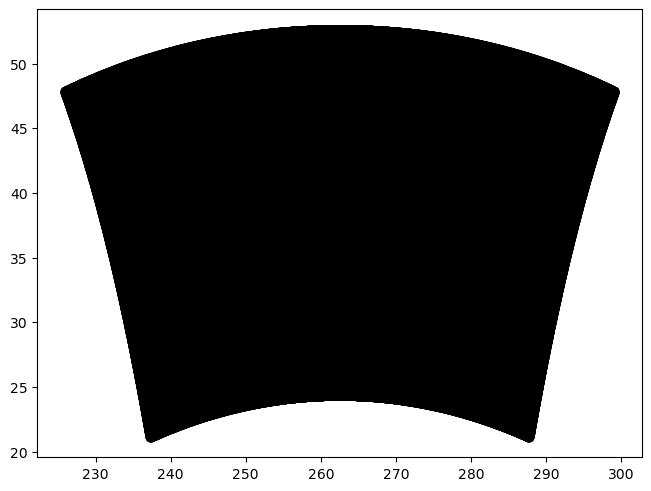

In [3]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(hds.lon, hds.lat, c="black")

### Bottom Left

In [4]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = hds.isel(
    x=slice(2, 10, 5),
    y=slice(2, 10, 5),
    x_b=slice(0, 11, 5),
    y_b=slice(0, 11, 5),
)

In [5]:
bl

<xarray.Dataset> Size: 4kB
Dimensions:  (t0: 1, y: 10, x: 10, y_b: 11, x_b: 11)
Coordinates:
  * t0       (t0) datetime64[ns] 8B 2015-01-15
    lat      (y, x) float64 800B 21.14 21.14 21.15 21.16 ... 21.41 21.42 21.42
    lon      (y, x) float64 800B 237.3 237.3 237.3 237.4 ... 237.4 237.4 237.5
    lat_b    (y_b, x_b) float64 968B ...
    lon_b    (y_b, x_b) float64 968B ...
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    orog     (t0, y, x) float32 400B ...

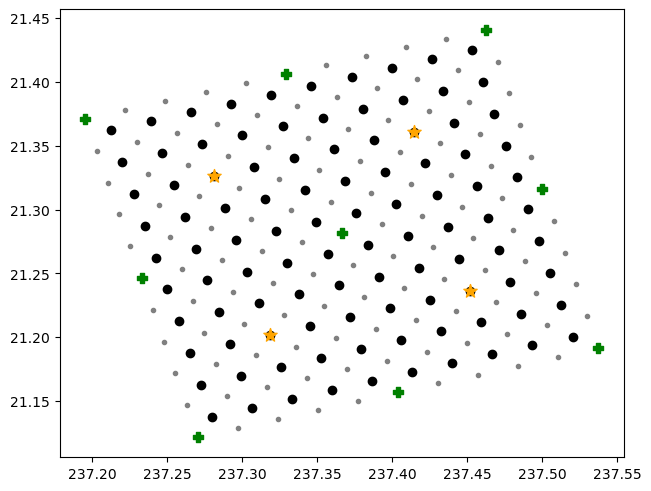

In [6]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

Looks good. So...
* Start `x,y` at index=2, skip by 5
* Start bounds at index=0, skip by 5

In [7]:
chds = hds.isel(
    x=slice(2, None, 5),
    y=slice(2, None, 5),
    x_b=slice(0, None, 5),
    y_b=slice(0, None, 5),
)

In [8]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = chds.isel(x=slice(2), y=slice(2), x_b=slice(3), y_b=slice(3))

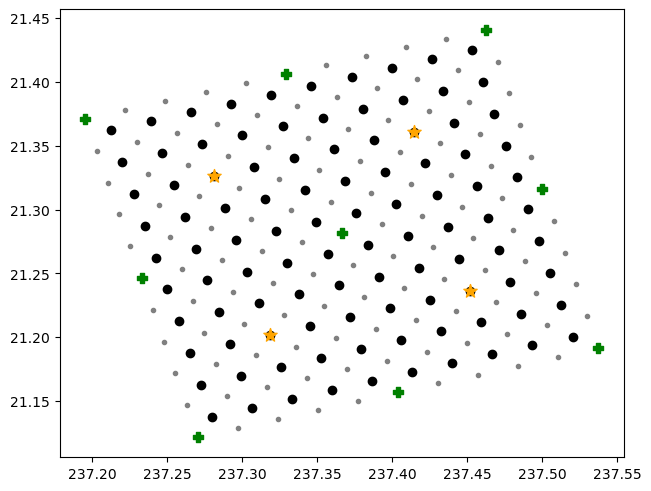

In [9]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

### Top Right

In [10]:
tr = hds.isel(x=slice(-10, None), y=slice(-10, None), x_b=slice(-11, None), y_b=slice(-11, None))
ctr = chds.isel(x=slice(-2, None), y=slice(-2, None), x_b=slice(-3, None), y_b=slice(-3, None))

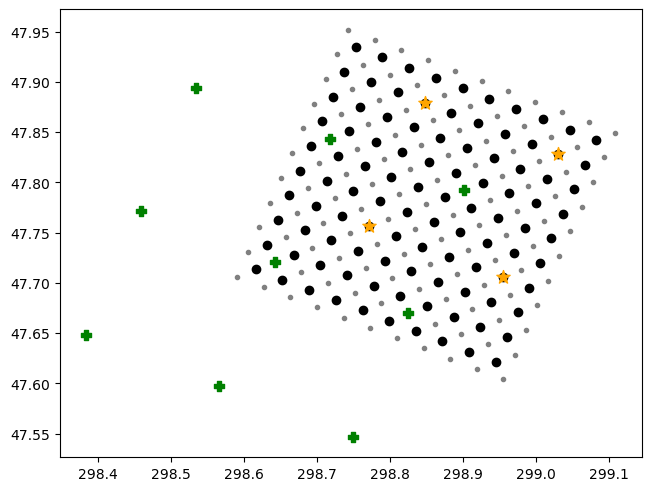

In [11]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tr.lon, tr.lat, c="black")
ax.scatter(tr.lon_b, tr.lat_b, c="gray", marker=".")
ax.scatter(ctr.lon, ctr.lat, c="orange", marker="*", s=100)
ax.scatter(ctr.lon_b, ctr.lat_b, c="green", marker="P", s=50)

This shows that we need to drop one coarse-grained point since the bounds can't reach the whole way.

So chop off one hanging point on the far right, lets hack off
* 4 x-points
* 4 y-points

from the original

In [12]:
len(hds.y)

1059

In [13]:
if len(hds.x) == 1799 and len(hds.y) == 1059:
    hds = hds.isel(
        x=slice(None, -4),
        x_b=slice(None, -4),
        y=slice(None, -4),
        y_b=slice(None, -4),
    )

In [14]:
chds = hds.isel(
    x=slice(2, None, 5),
    y=slice(2, None, 5),
    x_b=slice(0, None, 5),
    y_b=slice(0, None, 5),
)

Try top right corner again

In [15]:
tr = hds.isel(x=slice(-10, None), y=slice(-10, None), x_b=slice(-11, None), y_b=slice(-11, None))
ctr = chds.isel(x=slice(-2, None), y=slice(-2, None), x_b=slice(-3, None), y_b=slice(-3, None))

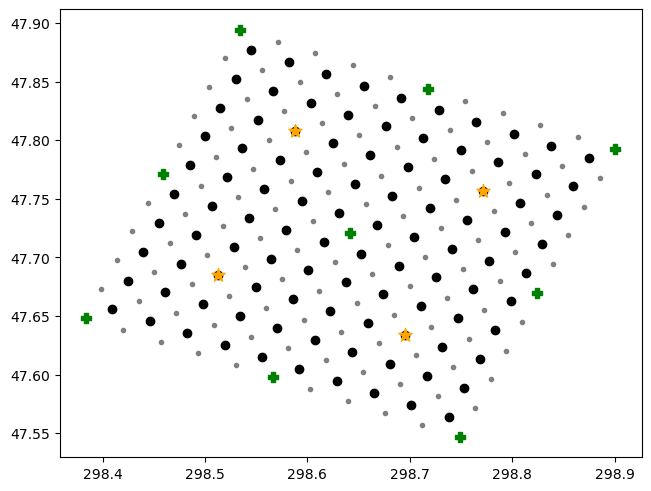

In [16]:
fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tr.lon, tr.lat, c="black")
ax.scatter(tr.lon_b, tr.lat_b, c="gray", marker=".")
ax.scatter(ctr.lon, ctr.lat, c="orange", marker="*", s=100)
ax.scatter(ctr.lon_b, ctr.lat_b, c="green", marker="P", s=50)

### Check Bottom Left again

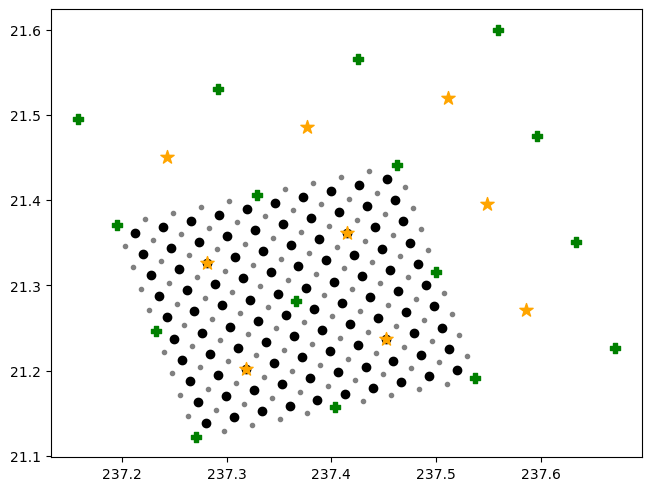

In [17]:
bl = hds.isel(x=slice(10), y=slice(10), x_b=slice(11), y_b=slice(11))
cbl = chds.isel(x=slice(3), y=slice(3), x_b=slice(4), y_b=slice(4))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(bl.lon, bl.lat, c="black")
ax.scatter(bl.lon_b, bl.lat_b, c="gray", marker=".")
ax.scatter(cbl.lon, cbl.lat, c="orange", marker="*", s=100)
ax.scatter(cbl.lon_b, cbl.lat_b, c="green", marker="P", s=50)

### Top left

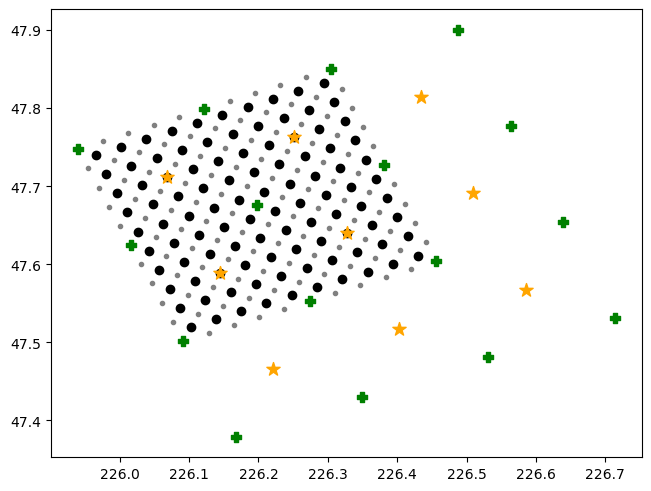

In [18]:
tl = hds.isel(x=slice(10), y=slice(-10, None), x_b=slice(11), y_b=slice(-11, None))
ctl = chds.isel(x=slice(3), y=slice(-3, None), x_b=slice(4), y_b=slice(-4, None))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(tl.lon, tl.lat, c="black")
ax.scatter(tl.lon_b, tl.lat_b, c="gray", marker=".")
ax.scatter(ctl.lon, ctl.lat, c="orange", marker="*", s=100)
ax.scatter(ctl.lon_b, ctl.lat_b, c="green", marker="P", s=50)

### Bottom Right

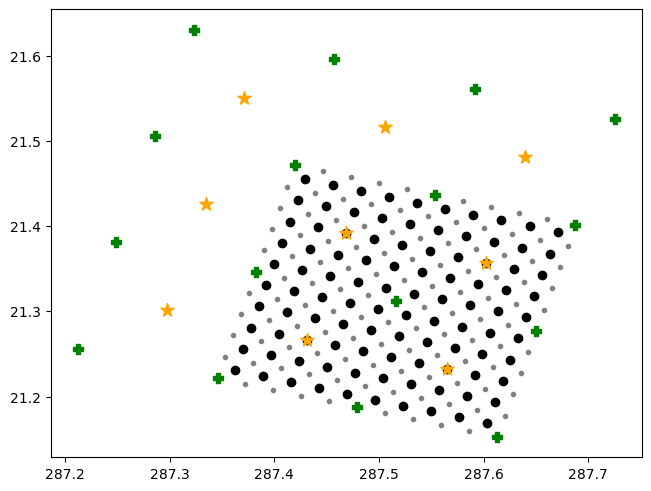

In [19]:
br = hds.isel(y=slice(10), x=slice(-10, None), y_b=slice(11), x_b=slice(-11, None))
cbr = chds.isel(y=slice(3), x=slice(-3, None), y_b=slice(4), x_b=slice(-4, None))

fig, ax = plt.subplots(constrained_layout=True)

ax.scatter(br.lon, br.lat, c="black")
ax.scatter(br.lon_b, br.lat_b, c="gray", marker=".")
ax.scatter(cbr.lon, cbr.lat, c="orange", marker="*", s=100)
ax.scatter(cbr.lon_b, cbr.lat_b, c="green", marker="P", s=50)

In [20]:
chds

<xarray.Dataset> Size: 3MB
Dimensions:  (t0: 1, y: 211, x: 359, y_b: 212, x_b: 360)
Coordinates:
  * t0       (t0) datetime64[ns] 8B 2015-01-15
    lat      (y, x) float64 606kB 21.2 21.24 21.27 21.31 ... 47.86 47.81 47.76
    lon      (y, x) float64 606kB 237.3 237.5 237.6 237.7 ... 298.4 298.6 298.8
    lat_b    (y_b, x_b) float64 611kB ...
    lon_b    (y_b, x_b) float64 611kB ...
Dimensions without coordinates: y, x, y_b, x_b
Data variables:
    orog     (t0, y, x) float32 303kB ...

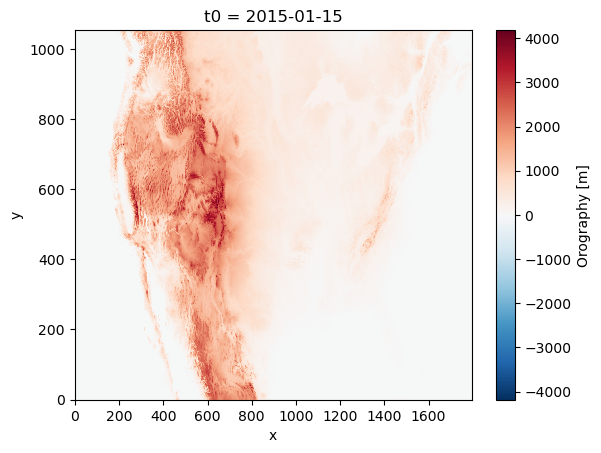

In [21]:
hds.orog.plot()

In [22]:
import xesmf

In [23]:
regridder = xesmf.Regridder(
    ds_in=hds,
    ds_out=chds,
    method="conservative",
)

/global/homes/t/timothys/.conda/envs/ufs2arco/lib/python3.11/site-packages/xesmf/backend.py:41: UserWarning: Input array is not F_CONTIGUOUS. Will affect performance.
  warnings.warn('Input array is not F_CONTIGUOUS. ' 'Will affect performance.')


In [24]:
nds = regridder(hds, keep_attrs=True)

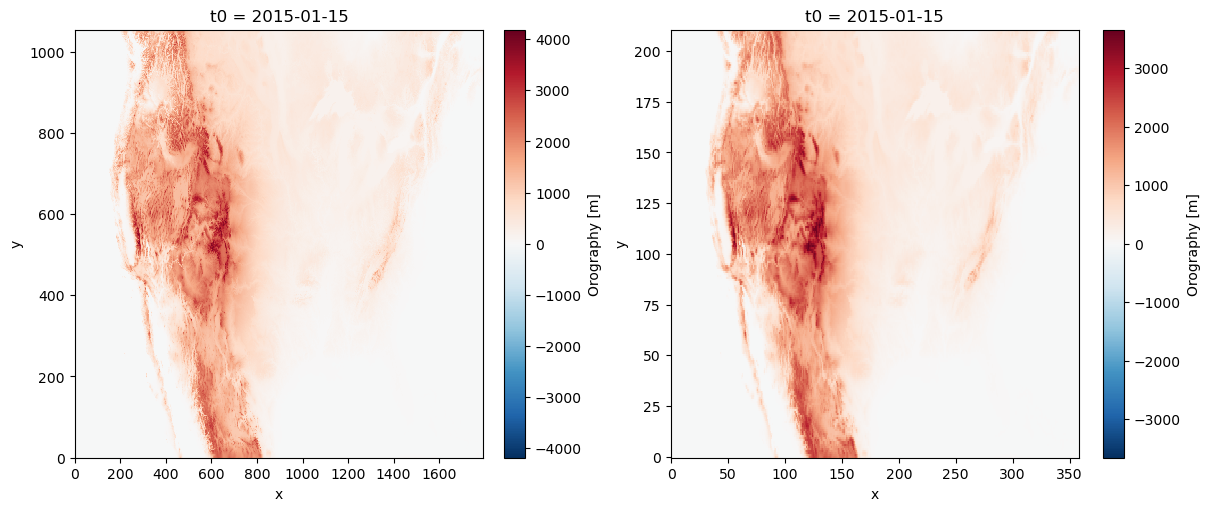

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

hds.orog.plot(ax=axs[0])
nds.orog.plot(ax=axs[1])

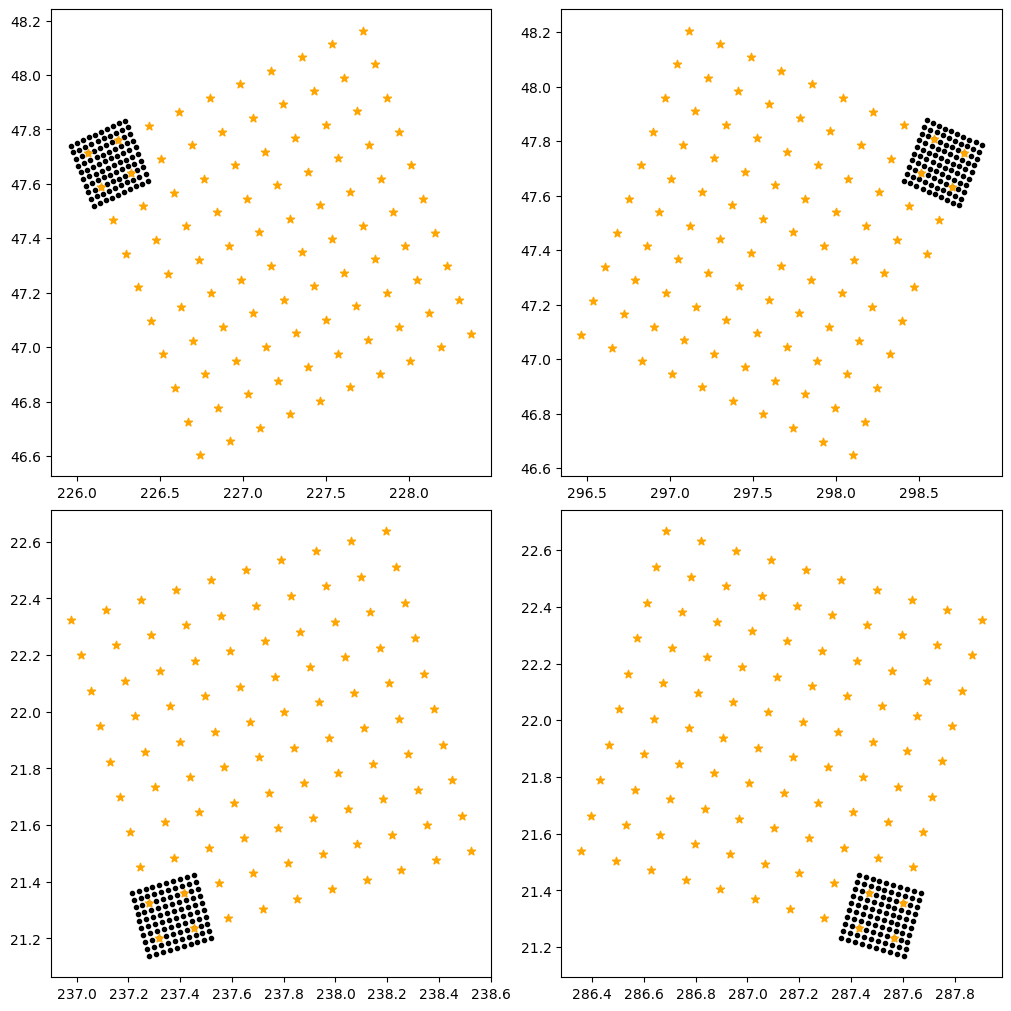

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,10), constrained_layout=True)

for slc, ax in zip(
    [
        {"x": slice(10), "y": slice(-10, None)},
        {"x": slice(-10, None), "y": slice(-10, None)},
        {"x": slice(10), "y": slice(10)},
        {"x": slice(-10, None), "y": slice(10)},
    ],
    axs.flatten(),
):
    ax.scatter(hds.lon.isel(**slc), hds.lat.isel(**slc), c="black", marker=".")
    ax.scatter(nds.lon.isel(**slc), nds.lat.isel(**slc), c="orange", marker="*")